# Prediction of annotations on mouse cells

## Install dependecies and PyMEGABASE

In [1]:
import os
os.system('pip install -q glob2==0.7 requests pytest-shutil==1.7.0  pyBigWig==0.3.18 urllib3==1.26.14 tqdm==4.64.1 joblib==1.2.0 ipywidgets==8.0.4 biopython')
os.system('pip install pydca --no-deps')
os.system('pip install -i https://test.pypi.org/pypi/ --extra-index-url https://pypi.org/simple PyMEGABASE==1.0.13 --no-deps')


0

Here we chose spleen sample as the target cell 

Only using histone modification Chip-Seq data

In [ ]:
import PyMEGABASE as PYMB

In [ ]:
#Initialize PyMEGABASE 
pym=PYMB.PyMEGABASE(cell_line='spleen', assembly='mm10', organism='mouse', signal_type='signal p-value',
                    histones=True,tf=True,small_rna=True,total_rna=True,n_states=10,res=50,
                    chromosome_sizes=[195471971,182113224,160039680,156508116,151834684,149736546,145441459,129401213,
                    124595110,130694993,122082543,120129022,120421639,124902244,104043685,98207768,
                    94987271,90702639,61431566,171031299]) 

    ****************************************************************************************    
       **** *** *** *** *** *** *** *** PyMEGABASE-1.0.0 *** *** *** *** *** *** *** ****       
       **** *** *** *** *** *** *** *** PyMEGABASE-1.0.0 *** *** *** *** *** *** *** ****       
       **** *** *** *** *** *** *** *** PyMEGABASE-1.0.0 *** *** *** *** *** *** *** ****       
    ****************************************************************************************    

              The PyMEGABASE class performs the prediction of genomic annotations               
              based on 1D data tracks of Chip-Seq and RNA-Seq. The input data is                
                                obtained from ENCODE data base.                                 
                          PyMEGABASE description is described in: TBD                           

        This package is the product of contributions from a number of people, including:        
                  Esteban Do

In [ ]:
#Download data for the selected cell line from ENCODE
pym.download_and_process_cell_line_data(nproc=10)

Number of replicas: 39


Process replicas: 100%|████████████████████████████████████████| 39/39 [01:53<00:00,  2.90s/it]


Experiments found in ENCODE for the selected cell line:
CTCF
H3K27ac
H3K27me3
H3K36me3
H3K4me1
H3K4me3
POLR2A
Predictions would use:  7  experiments


In [ ]:
#Download data for the reference cell line (GM12878) from ENCODE
pym.download_and_process_ref_data(nproc=10)

Number of replicas: 44


Process replicas: 100%|████████████████████████████████████████| 44/44 [03:21<00:00,  4.58s/it]


Prediction will use:
CTCF-human
H3K27ac-human
H3K27me3-human
H3K36me3-human
H3K4me1-human
H3K4me3-human
POLR2A-human


In [ ]:
#Preprocess the downloaded data for tranining, filtering experiments with signal-to-noise ration different from GM12878-hg19 (training set)
pym.training_set_up()

Not using H3K4me1  to predict
Not using POLR2A  to predict
Number of suitable experiments for prediction: 5
To train the following experiments are used:
CTCF
H3K27ac
H3K27me3
H3K36me3
H3K4me3


In [ ]:
#Perform the training using the downloaded reference data
pym.training(nproc=8,lambda_h=100,lambda_J=100)

Training started
Training finished
J and H produced


In [ ]:
# Predict subcompartments and compartments for all the chromosomes
subcompartments,compartments=pym.prediction_all_chrm(save_subcompartments=True,save_compartments=True)

Saving prediction in: spleen_mm10/predictions
Predicting subcompartments for chromosome:  1
Predicting subcompartments for chromosome:  2
Predicting subcompartments for chromosome:  3
Predicting subcompartments for chromosome:  4
Predicting subcompartments for chromosome:  5
Predicting subcompartments for chromosome:  6
Predicting subcompartments for chromosome:  7
Predicting subcompartments for chromosome:  8
Predicting subcompartments for chromosome:  9
Predicting subcompartments for chromosome:  10
Predicting subcompartments for chromosome:  11
Predicting subcompartments for chromosome:  12
Predicting subcompartments for chromosome:  13
Predicting subcompartments for chromosome:  14
Predicting subcompartments for chromosome:  15
Predicting subcompartments for chromosome:  16
Predicting subcompartments for chromosome:  17
Predicting subcompartments for chromosome:  18
Predicting subcompartments for chromosome:  19
Predicting subcompartments for chromosome:  X
Resolution: 50


<BarContainer object of 3 artists>

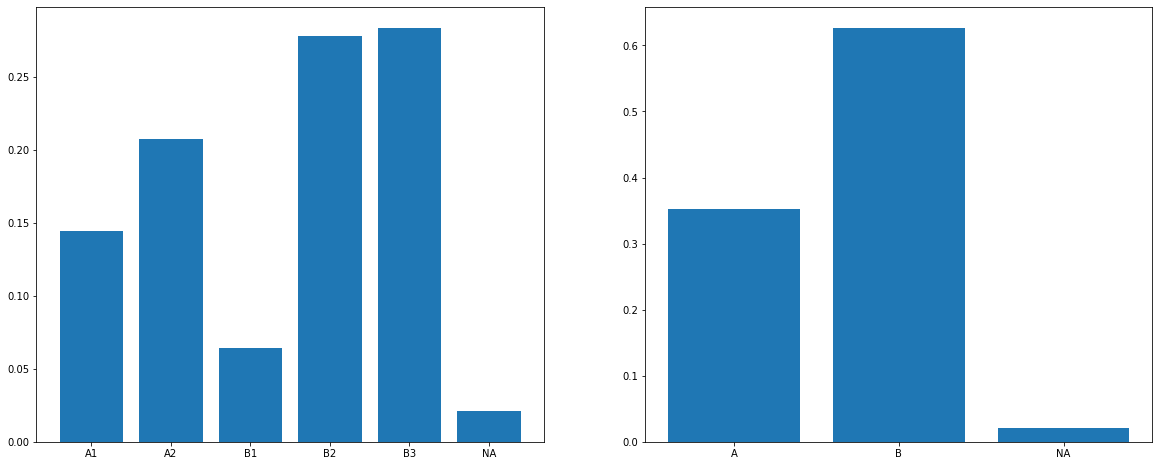

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

chr=2
fig, axs = plt.subplots(1, 2,figsize=(20,8))

#Check distribution of subcompartments
types_pyME=subcompartments[chr]
type_list, counts = np.unique(types_pyME,return_counts=True)
axs[0].bar(type_list,counts/len(types_pyME))

#Check distribution of compartments
types_pyME=compartments[chr]
type_list, counts = np.unique(types_pyME,return_counts=True)
axs[1].bar(type_list,counts/len(types_pyME))